# PART-A

# 1. Data import and Understanding.    [10M]

### A. Read the ‘Signals.csv’ as DataFrame and import required libraries [2M]

In [1]:
import warnings
import tensorflow as tf
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [5]:
tf.__version__

'2.8.2'

In [6]:
#Read the data as a data frame
signal_df = pd.read_csv('Signal.csv')
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### B. Check for missing values and print percentage for each attribute [2M]

In [7]:
signal_df.isna().sum() * 100 / len(signal_df)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

### C. Check for presence of duplicate records in the dataset and impute with appropriate method [2M]

In [8]:
signal_df[signal_df.duplicated(keep=False)]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [9]:
len(signal_df[signal_df.duplicated(keep=False)])

460

In [10]:
signal_df.drop_duplicates(keep=False, inplace=True)

In [11]:
signal_df[signal_df.duplicated(keep='first')]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


In [12]:
len(signal_df[signal_df.duplicated(keep=False)])

0

### D. Visualise distribution of the target variable [2M]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


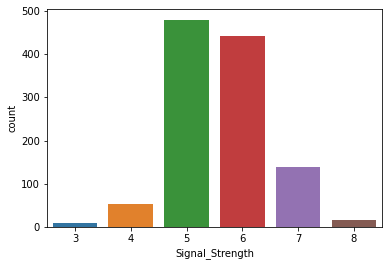

In [13]:
sns.countplot('Signal_Strength',data=signal_df)

plt.show()

In [14]:
Signal_Strength_group=signal_df.groupby(['Signal_Strength'])
Signal_Strength_group.size()

Signal_Strength
3     10
4     53
5    480
6    442
7    138
8     16
dtype: int64

### E. Share insights from the initial data analysis (at least 2) [2M]

#### i) The data has duplicate records but there are no null values in the data. 



#### ii) It is observed that Target is somewhat unbalanced and class 5 (also 6) in 'Signal_Strength' has the highest count.


# 2. Data preprocessing [7M]

### A. Split the data into X & Y [1M]

In [15]:
# Independent variables
X=signal_df.drop('Signal_Strength',axis=1)  

# Target variable
Y=signal_df['Signal_Strength']               


### B. Split the data into train & test with 70:30 proportion [1M]

In [16]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

### C. Print shape of all the 4 variables and verify if train and test data is in sync [1M]

In [17]:
# Confirming Matrix size
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(797, 11)
(342, 11)
(797,)
(342,)


### D. Normalise the train and test data with appropriate method [2M]

In [18]:
# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)   

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)  

### E. Transform Labels into format acceptable by Neural Network  [2M]

In [19]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(Y_Train, num_classes)
y_test_cat=to_categorical(Y_Test,num_classes)

# 3. Model Training & Evaluation using Neural Network [13M]

### A. Design a Neural Network to train a classifier [3M]

In [20]:
model_class = Sequential()
model_class.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_class.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_class.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_class.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model_class.add(Dense(10, activation='softmax'))

### B. Train the classifier using previously designed Architecture [2M]

In [21]:
adam = optimizers.Adam(lr=1e-3)

# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=adam)

# Fit the model
history=model_class.fit(x=X_Train_S, y=y_train, batch_size=20, epochs=100, validation_data=(X_Test_S, y_test_cat))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 1s 6ms/step - loss: 2.0417 - accuracy: 0.2610 - val_loss: 1.5846 - val_accuracy: 0.4240
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3126 - accuracy: 0.4605 - val_loss: 1.2959 - val_accuracy: 0.5146
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1424 - accuracy: 0.5684 - val_loss: 1.2157 - val_accuracy: 0.5351
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0622 - accuracy: 0.5859 - val_loss: 1.1712 - val_accuracy: 0.5789
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0287 - accuracy: 0.5947 - val_loss: 1.1568 - val_accuracy: 0.5614
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9828 - accuracy: 0.6073 - val_loss: 1.1517 - val_accuracy: 0.5556
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9497 - accuracy: 0.6223 - val_loss: 1.1536 - val_accuracy: 0.5292
Epoch 8/100
40/40 [======

### C. Plot 2 separate visuals [3M]

#### i) Training Loss and Validation Loss


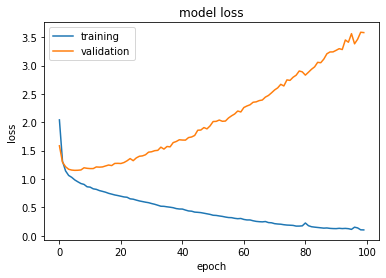

In [22]:
loss, accuracy  = model_class.evaluate(X_Test, y_test_cat, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
    


#### ii) Training Accuracy and Validation Accuracy

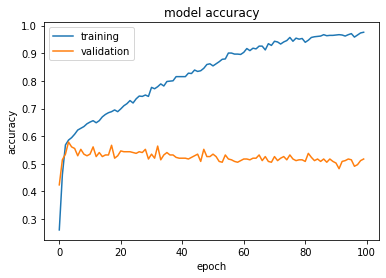

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### D. Design new architecture/update existing architecture in attempt to improve the performance of the model [2M]

In [24]:
model2_class = Sequential()
model2_class.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

model2_class.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model2_class.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model2_class.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model2_class.add(Dropout(0.5))
model2_class.add(BatchNormalization())
model2_class.add(Dense(10, activation='softmax'))

In [25]:
adam = optimizers.Adam(lr=1e-3)

# Compile the model
model2_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=adam)

# Fit the model
history=model2_class.fit(x=X_Train_S, y=y_train, batch_size=20, epochs=100, validation_data=(X_Test_S, y_test_cat))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 1s 6ms/step - loss: 2.5771 - accuracy: 0.1518 - val_loss: 2.2434 - val_accuracy: 0.2105
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 2.2834 - accuracy: 0.2396 - val_loss: 2.0761 - val_accuracy: 0.4035
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 2.0538 - accuracy: 0.3400 - val_loss: 1.9471 - val_accuracy: 0.4708
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 1.9075 - accuracy: 0.4379 - val_loss: 1.8213 - val_accuracy: 0.4678
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.6959 - accuracy: 0.5006 - val_loss: 1.7003 - val_accuracy: 0.4942
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.5936 - accuracy: 0.5031 - val_loss: 1.5665 - val_accuracy: 0.5088
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.4986 - accuracy: 0.5370 - val_loss: 1.4452 - val_accuracy: 0.5409
Epoch 8/100
40/40 [======

### E. Plot visuals as in Q3.C and share insights about difference observed in both the models [3M]

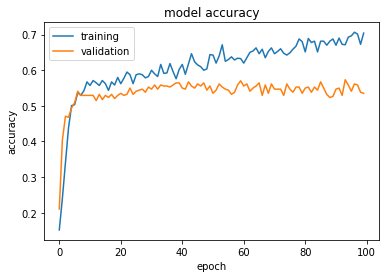

In [26]:
loss, accuracy  = model2_class.evaluate(X_Test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

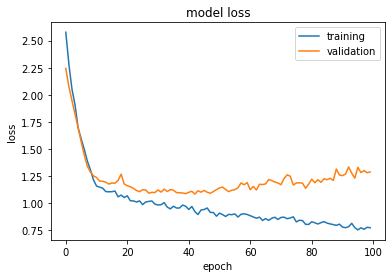

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### insights:
#### 1. The vanila Deep NN model has resulted in overfitting with good training accuracy of 98%
#### 2. To improve the first model, dropout and batch normalization are incorporated in subsequent Deep NN model
#### 3. The second model has resolved the overfitting situation although the training accuracy hit 78%  
#### 4. The performance can be increased with hyper-tuning parameters like learning-rate, epochs. loss function etc

# PART - B

# 1. Data Import and Exploration [5M]

In [28]:
#Importing Libraries
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math

%matplotlib inline
tensorflow.__version__


'2.8.2'

### A. Read the .h5 file and assign to a variable [2M]

In [29]:
#Open the file as readonly

vehicle_df=h5py.File('/content/drive/MyDrive/GL-AI-ML/Autonomous_Vehicles_SVHN_single_grey1.h5','r')

### B. Print all the keys from the .h5 file [1M]

In [30]:
vehicle_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### C. Split the data into X_train, X_test, Y_train, Y_test [2M]

In [31]:
#Load the training, testing, and validation data
X_train=vehicle_df['X_train']
X_test=vehicle_df['X_test']
y_train=vehicle_df['y_train']
y_test=vehicle_df['y_test']

In [32]:
Labels = np.unique(y_train)
len(Labels)

10

# 2. Data Visualisation and preprocessing [13M]

### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync [1M]

In [35]:
# Printing the shape and data type of training, testing
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)

print("y_train Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)


X_train Shape : (42000, 32, 32)
X_test Shape : (18000, 32, 32)
y_train Shape : (42000,)
y_test Shape : (18000,)


### B. Visualise first 10 images in train data and print its corresponding labels [4M]

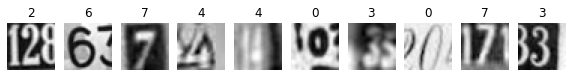

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [36]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.title("{}".format(y_train[i]))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### C. Reshape all the images with appropriate shape update the data in same variable [3M]

In [37]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)

### D. Normalise the images i.e. Normalise the pixel values [2M]

In [38]:
print(f'Min value for Train = {X_train.min()}, Test = {X_test.min()} ')
print(f'Max value for Train = {X_train.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0, Test = 0.0 
Max value for Train = 254.97450256347656, Test = 254.97450256347656 


In [39]:

maxVal=X_train.max()
X_train = X_train/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

After Normalization
Min value is 0.0
Max value is 1.0


### E. Transform Labels into format acceptable by Neural Network [2M]

In [40]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### F. Print total Number of classes in the Dataset [1M]

In [41]:
len(Labels)

10

# 3. Model Training & Evaluation using Neural Network [12M]

### A. Design a Neural Network to train a classifier [3M]

#### Model1 - with BatchNormalization 
#### Model2 - with BatchNormalization and Dropout

In [59]:

def nn_model():
    # create model
    model = Sequential()  
    model.add(BatchNormalization(input_shape = (1024,)))  ### Batch_Norm Layer
    
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    adam = optimizers.Adam(lr=1e-3)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model



In [60]:
def nn_model_best():
    # create model
    model = Sequential()  
    model.add(BatchNormalization(input_shape = (1024,)))  ### Batch_Norm Layer
    
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    adam = optimizers.Adam(lr=1e-3)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model

### B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3M]

In [61]:
# build the model
model1_cfr = nn_model()

# Fit the model
model1_history = model1_cfr.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)

Epoch 1/50
210/210 - 3s - loss: 1.5703 - accuracy: 0.4671 - val_loss: 1.2825 - val_accuracy: 0.6659 - 3s/epoch - 15ms/step
Epoch 2/50
210/210 - 2s - loss: 0.9597 - accuracy: 0.7029 - val_loss: 0.9052 - val_accuracy: 0.7257 - 2s/epoch - 11ms/step
Epoch 3/50
210/210 - 2s - loss: 0.8074 - accuracy: 0.7489 - val_loss: 0.8190 - val_accuracy: 0.7487 - 2s/epoch - 11ms/step
Epoch 4/50
210/210 - 2s - loss: 0.7192 - accuracy: 0.7772 - val_loss: 0.7526 - val_accuracy: 0.7776 - 2s/epoch - 11ms/step
Epoch 5/50
210/210 - 2s - loss: 0.6523 - accuracy: 0.7981 - val_loss: 0.7696 - val_accuracy: 0.7692 - 2s/epoch - 11ms/step
Epoch 6/50
210/210 - 2s - loss: 0.6145 - accuracy: 0.8092 - val_loss: 0.6722 - val_accuracy: 0.8035 - 2s/epoch - 11ms/step
Epoch 7/50
210/210 - 2s - loss: 0.5675 - accuracy: 0.8249 - val_loss: 0.6825 - val_accuracy: 0.7988 - 2s/epoch - 11ms/step
Epoch 8/50
210/210 - 2s - loss: 0.5411 - accuracy: 0.8308 - val_loss: 0.6448 - val_accuracy: 0.8149 - 2s/epoch - 10ms/step
Epoch 9/50
210/2

In [62]:
# build the model
model2_cfr = nn_model_best()

# Fit the model
model2_history = model2_cfr.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)

Epoch 1/50
210/210 - 3s - loss: 2.2489 - accuracy: 0.1490 - val_loss: 2.0640 - val_accuracy: 0.3244 - 3s/epoch - 14ms/step
Epoch 2/50
210/210 - 2s - loss: 1.9275 - accuracy: 0.2890 - val_loss: 1.5451 - val_accuracy: 0.5318 - 2s/epoch - 11ms/step
Epoch 3/50
210/210 - 2s - loss: 1.6593 - accuracy: 0.4086 - val_loss: 1.2700 - val_accuracy: 0.6253 - 2s/epoch - 11ms/step
Epoch 4/50
210/210 - 3s - loss: 1.5278 - accuracy: 0.4694 - val_loss: 1.1751 - val_accuracy: 0.6573 - 3s/epoch - 12ms/step
Epoch 5/50
210/210 - 2s - loss: 1.4097 - accuracy: 0.5173 - val_loss: 1.0575 - val_accuracy: 0.6906 - 2s/epoch - 11ms/step
Epoch 6/50
210/210 - 2s - loss: 1.3269 - accuracy: 0.5541 - val_loss: 0.9815 - val_accuracy: 0.7119 - 2s/epoch - 11ms/step
Epoch 7/50
210/210 - 2s - loss: 1.2598 - accuracy: 0.5779 - val_loss: 0.9380 - val_accuracy: 0.7266 - 2s/epoch - 10ms/step
Epoch 8/50
210/210 - 2s - loss: 1.2040 - accuracy: 0.6030 - val_loss: 0.8984 - val_accuracy: 0.7409 - 2s/epoch - 10ms/step
Epoch 9/50
210/2

### C. Evaluate performance of the model with appropriate metrics [2M]

In [63]:
loss, accuracy  = model1_cfr.evaluate(X_test, y_test, verbose=False)
#summary of classification model
model1_cfr.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_35 (Dense)            (None, 256)               262400    
                                                                 
 dense_36 (Dense)            (None, 64)                16448     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 10)                330       
                                                      

In [64]:
loss, accuracy  = model2_cfr.evaluate(X_test, y_test, verbose=False)
#summary of classification model
model2_cfr.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_40 (Dense)            (None, 256)               262400    
                                                                 
 dense_41 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                      

### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same [4M]

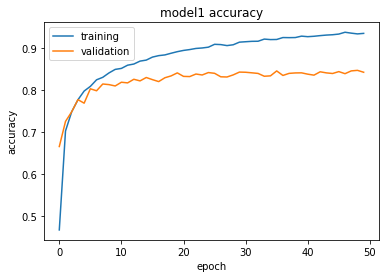

In [66]:
 # Plot Model1 Accuracy  
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

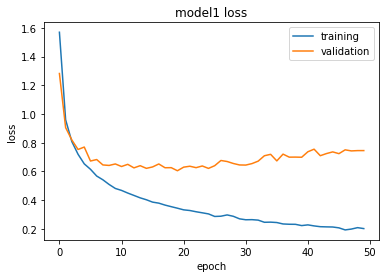

In [67]:
# Plot Model1 loss
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

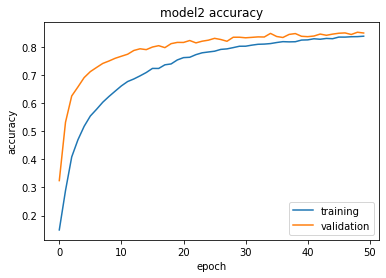

In [68]:
# Plot Model2 Accuracy    
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

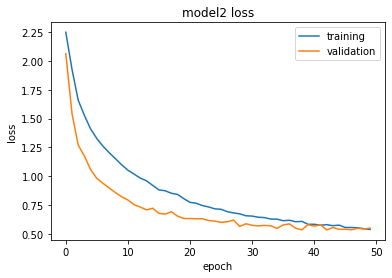

In [69]:
# Plot Model2 loss
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Observations:
#### 1. The Deep NN model with just BatchNormalization has resulted in overfitting with good training accuracy of 94%
#### 2. To improve the first model, dropout also incorporated in subsequent Deep NN model
#### 3. The second model has resolved the overfitting situation although the training accuracy hit 84%
#### 4. The performance can be increased with hyper-tuning parameters like learning-rate, epochs. loss function etc

